In [121]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [122]:
#Importing of data
df = pd.read_csv("Fortune 1000 Companies by Revenue.csv")

In [123]:
df

,rank,name,revenues,revenue_percent_change,profits,profits_percent_change,assets,market_value,change_in_rank,employees
0,1,Walmart,"$572,754",2.40%,"$13,673",1.20%,"$244,860","$409,795",-,"2,300,000"
1,2,Amazon,"$469,822",21.70%,"$33,364",56.40%,"$420,549","$1,658,807.30",-,"1,608,000"
2,3,Apple,"$365,817",33.30%,"$94,680",64.90%,"$351,002","$2,849,537.60",-,"154,000"
3,4,CVS Health,"$292,111",8.70%,"$7,910",10.20%,"$232,999","$132,839.20",-,"258,000"
4,5,UnitedHealth Group,"$287,597",11.80%,"$17,285",12.20%,"$212,206","$479,830.30",-,"350,000"
...,...,...,...,...,...,...,...,...,...,...
995,996,Vizio Holding,"$2,124",4%,($39.40),-138.40%,$935.80,"$1,705.10",-,800
996,997,1-800-Flowers.com,"$2,122.20",42.50%,$118.70,101.10%,"$1,076.70",$830,-,"4,800"
997,998,Cowen,"$2,112.80",30.20%,$295.60,36.60%,"$8,748.80",$744.10,-,"1,534"
998,999,Ashland Global Holdings,"$2,111",-11.20%,$220,-,"$6,612","$5,601.90",-130,"4,100"


In [124]:
df.columns

Index(['rank ', 'name ', 'revenues ', 'revenue_percent_change', 'profits ',
       'profits_percent_change', 'assets', 'market_value ', 'change_in_rank',
       'employees '],
      dtype='object')

In [125]:
#Correcting of column names
df.rename(columns={'rank ': 'rank', 
                   'name ':'name', 
                   'revenues ': 'revenues',
                  'profits ': 'profits',
                  'market_value ': 'market_value',
                  'employees ': 'employees'}, inplace= True)
df.columns

Index(['rank', 'name', 'revenues', 'revenue_percent_change', 'profits',
       'profits_percent_change', 'assets', 'market_value', 'change_in_rank',
       'employees'],
      dtype='object')

In [126]:
#Cleaning of data, removal of '$', ',' and retaining of negative values
df[df.columns[2]] = df[df.columns[2]].replace('[\$,]', '', regex=True).astype(float)
df[df.columns[3]] = df[df.columns[3]].replace('[\$,\%]', '', regex=True).replace(r'-$', '0', regex=True).astype(float)
df[df.columns[4]] = df[df.columns[4]].replace('[\$,]', '', regex=True).replace(r'-$', '0', regex=True).replace(r'\((.*)\)', '-\\1', regex=True).astype(float)
df[df.columns[5]] = df[df.columns[5]].replace('[\$,\%]', '', regex=True).replace(r'-$', '0', regex=True).astype(float)
df[df.columns[6]] = df[df.columns[6]].replace('[\$,]', '', regex=True).replace(r'-$', '0', regex=True).astype(float)
df[df.columns[7]] = df[df.columns[7]].replace('[\$,]', '', regex=True).replace(r'-$', '0', regex=True).astype(float)
df[df.columns[8]] = df[df.columns[8]].replace(r'-$', '0', regex=True).astype(int)
df[df.columns[9]] = df[df.columns[9]].replace('[\$,]', '', regex=True).replace(r'-$', '0', regex=True).astype(int)

In [127]:
df

,rank,name,revenues,revenue_percent_change,profits,profits_percent_change,assets,market_value,change_in_rank,employees
0,1,Walmart,572754.0,2.4,13673.0,1.2,244860.0,409795.0,0,2300000
1,2,Amazon,469822.0,21.7,33364.0,56.4,420549.0,1658807.3,0,1608000
2,3,Apple,365817.0,33.3,94680.0,64.9,351002.0,2849537.6,0,154000
3,4,CVS Health,292111.0,8.7,7910.0,10.2,232999.0,132839.2,0,258000
4,5,UnitedHealth Group,287597.0,11.8,17285.0,12.2,212206.0,479830.3,0,350000
...,...,...,...,...,...,...,...,...,...,...
995,996,Vizio Holding,2124.0,4.0,-39.4,-138.4,935.8,1705.1,0,800
996,997,1-800-Flowers.com,2122.2,42.5,118.7,101.1,1076.7,830.0,0,4800
997,998,Cowen,2112.8,30.2,295.6,36.6,8748.8,744.1,0,1534
998,999,Ashland Global Holdings,2111.0,-11.2,220.0,0.0,6612.0,5601.9,-130,4100


In [128]:
df['margins'] = df['profits']/df['revenues']*100
df

,rank,name,revenues,revenue_percent_change,profits,profits_percent_change,assets,market_value,change_in_rank,employees,margins
0,1,Walmart,572754.0,2.4,13673.0,1.2,244860.0,409795.0,0,2300000,2.387238
1,2,Amazon,469822.0,21.7,33364.0,56.4,420549.0,1658807.3,0,1608000,7.101413
2,3,Apple,365817.0,33.3,94680.0,64.9,351002.0,2849537.6,0,154000,25.881793
3,4,CVS Health,292111.0,8.7,7910.0,10.2,232999.0,132839.2,0,258000,2.707875
4,5,UnitedHealth Group,287597.0,11.8,17285.0,12.2,212206.0,479830.3,0,350000,6.010146
...,...,...,...,...,...,...,...,...,...,...,...
995,996,Vizio Holding,2124.0,4.0,-39.4,-138.4,935.8,1705.1,0,800,-1.854991
996,997,1-800-Flowers.com,2122.2,42.5,118.7,101.1,1076.7,830.0,0,4800,5.593252
997,998,Cowen,2112.8,30.2,295.6,36.6,8748.8,744.1,0,1534,13.990913
998,999,Ashland Global Holdings,2111.0,-11.2,220.0,0.0,6612.0,5601.9,-130,4100,10.421601


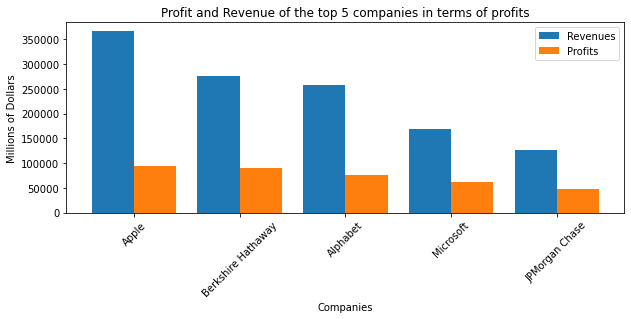

In [148]:
df = df.sort_values(by=['profits'], ascending=False)
numCompanies = 5
x_axis = np.arange(numCompanies)
fig, ax = plt.subplots(figsize=(10,3.5))
plt.bar(x_axis - 0.2, df['revenues'].head(numCompanies), 0.4, label = 'Revenues')
plt.bar(x_axis + 0.2, df['profits'].head(numCompanies), 0.4, label = 'Profits')

plt.xticks(x_axis, df['name'].head(numCompanies), rotation=45)
plt.xlabel("Companies")
plt.ylabel("Millions of Dollars")
plt.title(f"Profit and Revenue of the top {numCompanies} companies in terms of profits")
plt.legend()
plt.savefig("Images\\BC_Top5 Profit and Revenue.jpg", dpi= 300, bbox_inches = "tight")
plt.show()


In [130]:
df.head(10)

,rank,name,revenues,revenue_percent_change,profits,profits_percent_change,assets,market_value,change_in_rank,employees,margins
2,3,Apple,365817.0,33.3,94680.0,64.9,351002.0,2849537.6,0,154000,25.881793
6,7,Berkshire Hathaway,276094.0,12.5,89795.0,111.2,958784.0,779542.3,-1,372000,32.523343
7,8,Alphabet,257637.0,41.2,76033.0,88.8,359268.0,1842326.1,1,156500,29.511677
13,14,Microsoft,168088.0,17.5,61271.0,38.4,333779.0,2311358.9,1,181000,36.451740
23,24,JPMorgan Chase,127202.0,-1.8,48334.0,65.9,3743567.0,402526.9,-5,271025,37.997830
26,27,Meta Platforms,117929.0,37.2,39370.0,35.1,165987.0,605251.0,7,71970,33.384494
1,2,Amazon,469822.0,21.7,33364.0,56.4,420549.0,1658807.3,0,1608000,7.101413
35,36,Bank of America,93851.0,0.1,31978.0,78.7,3169495.0,332433.3,-7,208248,34.073159
5,6,Exxon Mobil,285640.0,57.4,23040.0,0.0,338923.0,349652.4,4,63000,8.066097
32,33,Fannie Mae,101543.0,-4.6,22176.0,87.9,4229166.0,909.1,-8,7400,21.839024


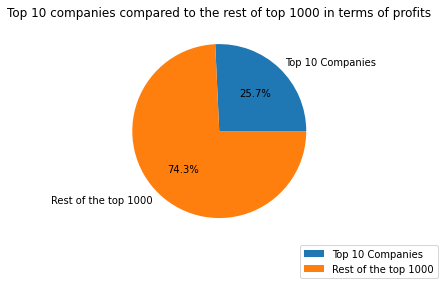

In [150]:
numberOfCompanies = 10
pie = np.array([df.nlargest(numberOfCompanies, columns = 'profits')['profits'].sum(), df.nsmallest(1000-numberOfCompanies, columns='profits')['profits'].sum()])
labels = [f"Top {numberOfCompanies} Companies", "Rest of the top 1000"]

plt.pie(pie, labels = labels, autopct="%1.1f%%")
plt.title(f"Top {numberOfCompanies} companies compared to the rest of top 1000 in terms of profits")
plt.legend(labels, bbox_to_anchor=(0.85,0), loc="upper left")
plt.savefig(f"Images\\PC_Top{numberOfCompanies} Profit.jpg", dpi= 300, bbox_inches = "tight")
plt.show()

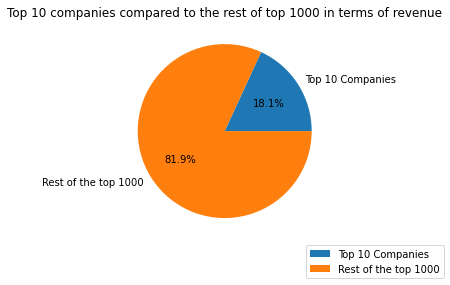

In [151]:
numberOfCompanies = 10
pie = np.array([df.nlargest(numberOfCompanies, columns = 'revenues')['revenues'].sum(), df.nsmallest(1000-numberOfCompanies, columns='revenues')['revenues'].sum()])
labels = [f"Top {numberOfCompanies} Companies", "Rest of the top 1000"]

plt.pie(pie, labels = labels, autopct="%1.1f%%")
plt.title(f"Top {numberOfCompanies} companies compared to the rest of top 1000 in terms of revenue")
plt.legend(labels, bbox_to_anchor=(0.85,0), loc="upper left")
plt.savefig(f"Images\\PC_Top{numberOfCompanies} Revenue.jpg", dpi= 300, bbox_inches = "tight")
plt.show()

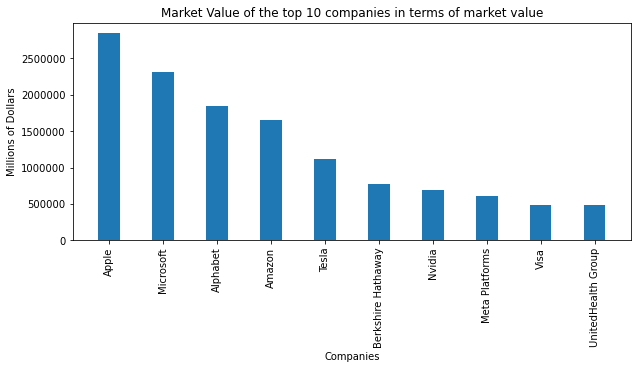

In [152]:
df = df.sort_values(by=['market_value'], ascending=False)
numCompanies = 10
x_axis = np.arange(numCompanies)
fig, ax = plt.subplots(figsize=(10,4))
plt.bar(x_axis, df['market_value'].head(numCompanies), 0.4)
ax.ticklabel_format(style='plain')
plt.xticks(x_axis, df['name'].head(numCompanies), rotation=90)
plt.xlabel("Companies")
plt.ylabel("Millions of Dollars")
plt.title(f"Market Value of the top {numCompanies} companies in terms of market value")
plt.savefig("Images\\BC_Top10 Market Value.jpg", dpi= 300, bbox_inches = "tight")
plt.show()

In [134]:
df.head(10)

,rank,name,revenues,revenue_percent_change,profits,profits_percent_change,assets,market_value,change_in_rank,employees,margins
2,3,Apple,365817.0,33.3,94680.0,64.9,351002.0,2849537.6,0,154000,25.881793
13,14,Microsoft,168088.0,17.5,61271.0,38.4,333779.0,2311358.9,1,181000,36.451740
7,8,Alphabet,257637.0,41.2,76033.0,88.8,359268.0,1842326.1,1,156500,29.511677
1,2,Amazon,469822.0,21.7,33364.0,56.4,420549.0,1658807.3,0,1608000,7.101413
64,65,Tesla,53823.0,70.7,5519.0,665.5,62131.0,1113707.8,35,99290,10.253981
6,7,Berkshire Hathaway,276094.0,12.5,89795.0,111.2,958784.0,779542.3,-1,372000,32.523343
133,134,Nvidia,26914.0,61.4,9752.0,125.1,44187.0,684878.6,50,22473,36.233930
26,27,Meta Platforms,117929.0,37.2,39370.0,35.1,165987.0,605251.0,7,71970,33.384494
146,147,Visa,24105.0,10.3,12311.0,13.3,82896.0,480022.5,-14,21500,51.072392
4,5,UnitedHealth Group,287597.0,11.8,17285.0,12.2,212206.0,479830.3,0,350000,6.010146


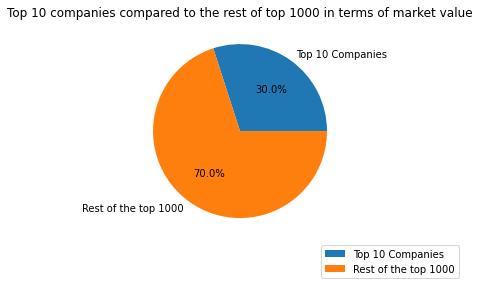

In [153]:
numberOfCompanies = 10
pie = np.array([df.nlargest(numberOfCompanies, columns = 'market_value')['market_value'].sum(), df.nsmallest(1000-numberOfCompanies, columns='market_value')['market_value'].sum()])
labels = [f"Top {numberOfCompanies} Companies", "Rest of the top 1000"]

plt.pie(pie, labels = labels, autopct="%1.1f%%")
plt.title(f"Top {numberOfCompanies} companies compared to the rest of top 1000 in terms of market value")
plt.legend(labels, bbox_to_anchor=(0.85,0), loc="upper left")
plt.savefig(f"Images\\PC_Top{numberOfCompanies} Market Value.jpg", dpi= 300, bbox_inches = "tight")
plt.show()

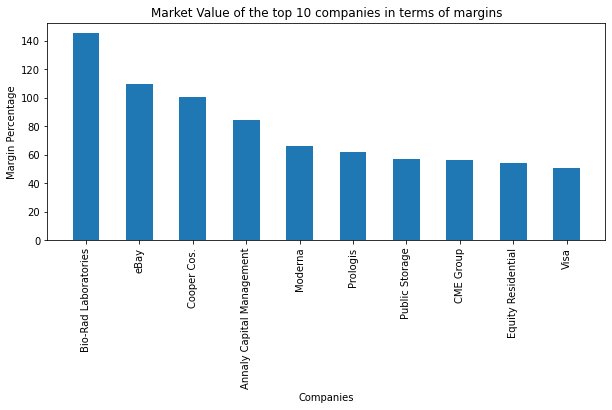

In [136]:
df = df.sort_values(by=['margins'], ascending=False)
numCompanies = 10
x_axis = np.arange(numCompanies)
fig, ax = plt.subplots(figsize=(10,4))
plt.bar(x_axis, df['margins'].head(numCompanies), 0.5)
plt.xticks(x_axis, df['name'].head(numCompanies), rotation=90)
plt.xlabel("Companies")
plt.ylabel("Margin Percentage")
plt.title(f"Market Value of the top {numCompanies} companies in terms of margins")
plt.savefig("Images\\BC_Top10 Margins.jpg", dpi= 300)
plt.show()

In [137]:
df.head(10)

,rank,name,revenues,revenue_percent_change,profits,profits_percent_change,assets,market_value,change_in_rank,employees,margins
849,850,Bio-Rad Laboratories,2922.5,14.8,4245.9,11.6,17775.8,16982.2,-21,7900,145.283148
300,301,eBay,12394.0,9.2,13608.0,140.1,26626.0,33641.9,-25,10800,109.795062
850,851,Cooper Cos.,2922.5,20.2,2944.7,1135.2,9606.2,20587.8,2,12000,100.759624
866,867,Annaly Capital Management,2836.2,1188.5,2389.9,0.0,76764.1,10281.0,0,171,84.264156
194,195,Moderna,18471.0,2199.1,12202.0,0.0,24669.0,69424.3,0,2700,66.060311
628,629,Prologis,4759.4,7.2,2939.7,98.4,58486.2,119524.5,-45,2053,61.766189
764,765,Public Storage,3415.8,17.2,1953.3,43.9,17380.9,68438.2,-3,5800,57.184261
635,636,CME Group,4689.7,-4.0,2636.4,25.2,196780.3,85492.3,-99,3480,56.216816
927,928,Equity Residential,2464.0,-4.2,1332.9,45.9,21169.2,33802.5,-104,2400,54.094968
146,147,Visa,24105.0,10.3,12311.0,13.3,82896.0,480022.5,-14,21500,51.072392
